<a href="https://colab.research.google.com/github/Razany98/Razany98/blob/main/Gender_Classification_2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uploading Dataset and importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/voice.csv')

# Reading the dataset & Pre-Processing

In [ ]:
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [ ]:
df.isnull().sum()
df.isna().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

Dimension of the dataset

In [ ]:
print("gender set dimensions : {}".format(df.shape))

gender set dimensions : (3168, 21)


# visualization

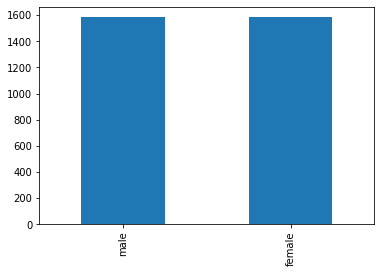

In [ ]:
df['label'].value_counts().plot.bar()

In [ ]:
#1 for Male and 0 for Female
df.label = [1 if each == "male" else 0 for each in df.label]
#1 for Male and 0 for Female

In [ ]:
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,0
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,0
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,0
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,0


# Splitting & Scaling the dataset

Drop irrelevant feature

In [ ]:
y = df['label'].copy()
X = df.drop('label', axis=1).copy()

In [ ]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [ ]:
X.shape

(3168, 20)

In [ ]:
inputs = tf.keras.Input(shape=(X.shape[1],))

x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20)]              0         
                                                                 
 dense (Dense)               (None, 64)                1344      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,569
Trainable params: 5,569
Non-trainable params: 0
_________________________________________________________________


Using 'adam' optimization algorithm

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)


Epoch 1/100
56/56 [==============================] - 2s 9ms/step - loss: 0.4585 - accuracy: 0.8218 - auc: 0.9100 - val_loss: 0.2490 - val_accuracy: 0.9302 - val_auc: 0.9899
Epoch 2/100
56/56 [==============================] - 0s 3ms/step - loss: 0.1775 - accuracy: 0.9532 - auc: 0.9890 - val_loss: 0.1121 - val_accuracy: 0.9730 - val_auc: 0.9946
Epoch 3/100
56/56 [==============================] - 0s 3ms/step - loss: 0.0984 - accuracy: 0.9701 - auc: 0.9953 - val_loss: 0.0758 - val_accuracy: 0.9820 - val_auc: 0.9957
Epoch 4/100
56/56 [==============================] - 0s 3ms/step - loss: 0.0769 - accuracy: 0.9757 - auc: 0.9965 - val_loss: 0.0663 - val_accuracy: 0.9842 - val_auc: 0.9966
Epoch 5/100
56/56 [==============================] - 0s 3ms/step - loss: 0.0668 - accuracy: 0.9769 - auc: 0.9968 - val_loss: 0.0674 - val_accuracy: 0.9865 - val_auc: 0.9958
Epoch 6/100
56/56 [==============================] - 0s 3ms/step - loss: 0.0607 - accuracy: 0.9797 - auc: 0.9976 - val_loss: 0.0602 - v

In [ ]:
model.evaluate(X_test, y_test)

30/30 [==============================] - 0s 1ms/step - loss: 0.0656 - accuracy: 0.9779 - auc: 0.9976


[0.06555173546075821, 0.9779179692268372, 0.9976124167442322]

# benchmark model

In [ ]:
#Accuracy of logstic regression 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
lr_accuracy = classifier.score(X_test, y_test)
print(f"Accuracy of Logistic Regression Classifier is:{lr_accuracy}")

Accuracy of Logistic Regression Classifier is:0.9726603575184016


In [ ]:
#Accuracy of SVM
from sklearn.svm import SVC
classifier =  SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
lr_accuracy = classifier.score(X_test, y_test)
print(f"Accuracy of SVM Classifier is:{lr_accuracy}")

Accuracy of SVM Classifier is:0.9705573080967402


In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm) #Print the matrix

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[439  13]
 [ 26 473]]
Accuracy: 0.9589905362776026


In [ ]:
y_pred = model.predict(X_test)

Classification Algorithm 'SVM'

In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9810725552050473

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
#Try incresing the regularization 
from sklearn.svm import SVC
model = SVC(C=10)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9800210304942166

In [ ]:
#Try applying gamma 
model_g = SVC(gamma=10)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.508937960042061

In [ ]:
#Try applying linear kernel 
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)
model_linear_kernal.score(X_test, y_test)

0.9705573080967402

In [ ]:
#Try applying linear kernel 
model_linear_kernal = SVC(kernel='rbf')
model_linear_kernal.fit(X_train, y_train)
model_linear_kernal.score(X_test, y_test)

0.9810725552050473

# Evaluation Matrixes

In [ ]:
#predicting the Test set results 
Y_pred = classifier.predict(X_test)

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, Y_pred)
print(cm)

[[437  15]
 [ 13 486]]


In [ ]:
# Use score method to get accuracy of model
score = classifier.score(X_test, y_test)
print(score)

0.9705573080967402


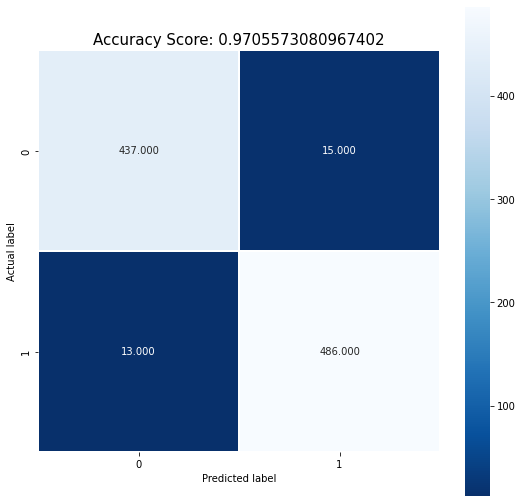

In [ ]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[445   7]
 [ 11 488]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       452
           1       0.99      0.98      0.98       499

    accuracy                           0.98       951
   macro avg       0.98      0.98      0.98       951
weighted avg       0.98      0.98      0.98       951

